<a href="https://colab.research.google.com/github/MdBipul/deep-learning/blob/master/Therm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # শুধুমাত্র টেন্সর-ফ্লো ২.x ব্যবহার করবো 
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
keras = tf.keras
import numpy as np

In [4]:
chips_15s    = np.array([44.000,46.400,43.600,35.000,35.000,32.600,28.900,27.700,25.500,20.375,12.500,37.000,37.500,36.500,36.200,33.000,43.000,46.000,29.000,31.700,31.000,28.750,23.500,32.400,31.000,29.500,22.500,20.600,35.000,33.100,31.500,28.800,21.300,37.800,37.000,37.100,36.200,31.400,30.200,31.300,26.100,25.200,23.660,22.250,17.500,15.500,14.750,15.000,14.000,18.500,27.700,26.000,21.700,12.500,12.500],  dtype=float)
temp_celsius = np.array([26.944, 25.833, 25.556, 23.056, 21.389, 20.000, 18.889, 18.333, 16.389, 13.889, 12.778, 24.583, 23.333, 23.333, 22.500, 18.889, 25.278, 25.833, 20.278, 20.278, 20.000, 18.889, 15.000, 21.111, 20.556, 19.444, 16.250, 14.722, 22.222, 21.667, 20.556, 19.167, 15.556, 23.889, 22.917, 22.500, 21.111, 19.722, 18.889, 20.556, 17.222, 17.222, 16.111, 16.667, 13.611, 12.778, 11.111, 11.667, 10.000, 11.111, 18.333, 17.222, 15.000, 10.417, 9.5833],  dtype=float)

for i,c in enumerate(chips_15s):
  print("{} Chirps in 15 Seconds = {} degrees Celsius (C)".format(c, temp_celsius[i]))

44.0 Chirps in 15 Seconds = 26.944 degrees Celsius (C)
46.4 Chirps in 15 Seconds = 25.833 degrees Celsius (C)
43.6 Chirps in 15 Seconds = 25.556 degrees Celsius (C)
35.0 Chirps in 15 Seconds = 23.056 degrees Celsius (C)
35.0 Chirps in 15 Seconds = 21.389 degrees Celsius (C)
32.6 Chirps in 15 Seconds = 20.0 degrees Celsius (C)
28.9 Chirps in 15 Seconds = 18.889 degrees Celsius (C)
27.7 Chirps in 15 Seconds = 18.333 degrees Celsius (C)
25.5 Chirps in 15 Seconds = 16.389 degrees Celsius (C)
20.375 Chirps in 15 Seconds = 13.889 degrees Celsius (C)
12.5 Chirps in 15 Seconds = 12.778 degrees Celsius (C)
37.0 Chirps in 15 Seconds = 24.583 degrees Celsius (C)
37.5 Chirps in 15 Seconds = 23.333 degrees Celsius (C)
36.5 Chirps in 15 Seconds = 23.333 degrees Celsius (C)
36.2 Chirps in 15 Seconds = 22.5 degrees Celsius (C)
33.0 Chirps in 15 Seconds = 18.889 degrees Celsius (C)
43.0 Chirps in 15 Seconds = 25.278 degrees Celsius (C)
46.0 Chirps in 15 Seconds = 25.833 degrees Celsius (C)
29.0 Chirps 

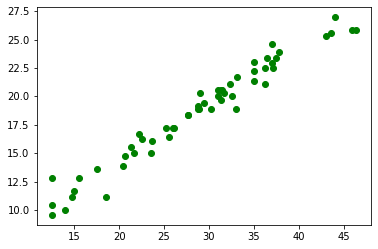

In [9]:
import matplotlib.pyplot as plt

X = chips_15s
y = temp_celsius

plt.scatter(X, y, color='green')

plt.show()

In [10]:
from statistics import mean

def best_fit_slope_and_intercept(X,y):
    m = (((mean(X)*mean(y)) - mean(X*y)) /
         ((mean(X)*mean(X)) - mean(X*X)))
    
    b = mean(y) - m*mean(X)
    
    return m, b

m, b = best_fit_slope_and_intercept(X,y)

print(m,b)

0.49543811977958857 4.458638516454446


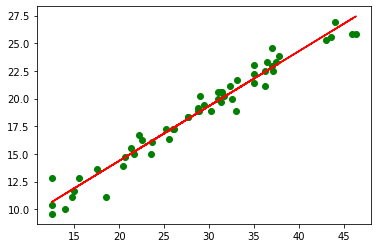

In [12]:
# regression_line = [(m*x)+b for x in X]

regression_line = []
for x in X:
    regression_line.append((m*x)+b)

plt.scatter(X,y,color='green')
plt.plot(X, regression_line,color='red')
plt.show()

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [0]:
model = tf.keras.Sequential([l0])

In [0]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [16]:
history = model.fit(X, y, epochs=500, verbose=True)

Train on 55 samples
Epoch 1/500
55/55 [==============================] - 0s 9ms/sample - loss: 9.0789
Epoch 2/500
55/55 [==============================] - 0s 112us/sample - loss: 7.6075
Epoch 3/500
55/55 [==============================] - 0s 79us/sample - loss: 4.6756
Epoch 4/500
55/55 [==============================] - 0s 72us/sample - loss: 3.0705
Epoch 5/500
55/55 [==============================] - 0s 79us/sample - loss: 5.2486
Epoch 6/500
55/55 [==============================] - 0s 101us/sample - loss: 3.1567
Epoch 7/500
55/55 [==============================] - 0s 116us/sample - loss: 2.8074
Epoch 8/500
55/55 [==============================] - 0s 130us/sample - loss: 3.4212
Epoch 9/500
55/55 [==============================] - 0s 127us/sample - loss: 2.4744
Epoch 10/500
55/55 [==============================] - 0s 125us/sample - loss: 2.2367
Epoch 11/500
55/55 [==============================] - 0s 120us/sample - loss: 2.7199
Epoch 12/500
55/55 [==============================] - 0s 12

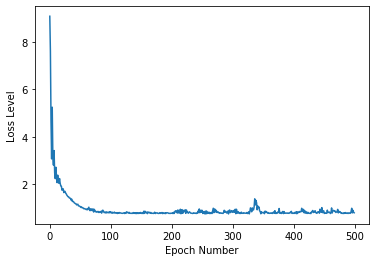

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Level")
plt.plot(history.history['loss'])

In [18]:
print(model.predict([34]))

[[21.102345]]


In [19]:
l0.get_weights()

[array([[0.49004304]], dtype=float32), array([4.440881], dtype=float32)]